## Taking another look at the housing data

In [29]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [34]:
X_tr_med = pd.read_csv('X_tr_med', index_col=0)
X_val_med = pd.read_csv('X_val_med', index_col=0)

df = pd.concat([X_tr_med, X_val_med])

y_tr = pd.read_csv('y_tr', index_col=0)
y_val = pd.read_csv('y_val', index_col=0)
target = pd.concat([y_tr, y_val])
target = pd.Series(target.values.ravel())

In [13]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MoSold', 'LotFrontage', 'LotArea',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalSF', 'LowQualFinPct',
       'DeckPorchSF', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'YrSold',
       'Street', 'Alley', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual',
       'OverallCond', 'ExterQual', 'Ext

In [18]:
df.shape

(1460, 89)

In [96]:
df.reset_index(drop=True, inplace=True)
df.head()

,MSSubClass,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,PavedDrive,PoolQC,CentralAir,HasGarage,HasAlley,HasBsmt,HasFireplace,HasPool,HasFence,HasVeneer
0,151287.5,120000,162900,164500,119000,165000,162700.0,168000,192140,159000,...,168000,162000,0,1,0,1,0,0,0,0
1,164500.0,173000,162900,165000,180500,165000,162700.0,168000,159975,159000,...,168000,162000,1,1,0,1,1,0,0,1
2,164500.0,173000,162900,207500,135000,165000,162700.0,168000,159975,159000,...,168000,162000,1,1,0,1,0,0,0,0
3,217855.0,173000,162900,159000,180500,167500,162700.0,168000,192140,159000,...,168000,162000,1,1,0,1,1,0,0,0
4,159500.0,173000,162900,159000,187875,165000,162700.0,168000,153900,176500,...,168000,181000,1,1,0,1,1,1,1,1


In [35]:
target.head()

0    107500
1    160000
2    145000
3    192140
4    181000
dtype: int64

let's see if any of these varaibles are correlated

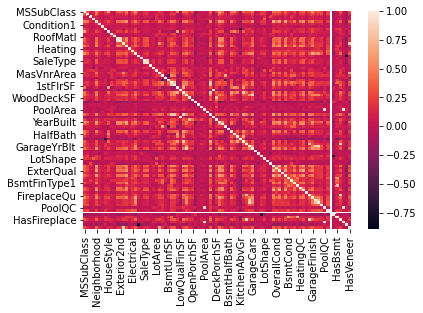

In [11]:
sns.heatmap(df.corr())

looks like not really. 

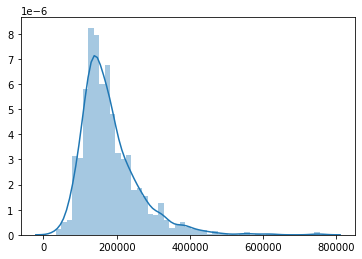

In [14]:
sns.distplot(target)

I'm going to use a Random Forest because:

- a lot of the variables are skewed, including the target
- there are a lot of ordinal and caregorical variables
- there are a lot of different scales among the variables

params = {'n_estimators': [100,200,500,1000], 
          'max_depth': [2,5,10,20,None], 
          'min_samples_leaf': [1,2,5,10], 
          'max_features': ['auto', 'sqrt', 'log2']}

rf = RandomForestRegressor()
model = GridSearchCV(rf, params)
model.fit(df, target)

In [26]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
for criterion in ['mse', 'mae']:
    rf = RandomForestRegressor(n_estimators=1000, criterion=criterion, max_depth=20, 
                               max_features='sqrt')
    x_train, x_test, y_train, y_test = train_test_split(df, target)
    rf.fit(x_train, y_train)
    print(criterion)
    print(f'train score: {rf.score(x_train, y_train)}')
    print(f'test score: {rf.score(x_test, y_test)}')

mse
train score: 0.9808899720373504
test score: 0.8781648506420545
mae
train score: 0.9822604710317115
test score: 0.8805969004581043


In [37]:
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
import sys
sys.path.append('/Users/alice/Code/data_science/')
import plots

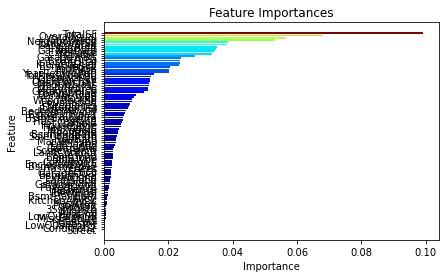

In [46]:
features,importances = plots.feature_importances(rf.feature_importances_, df.columns)

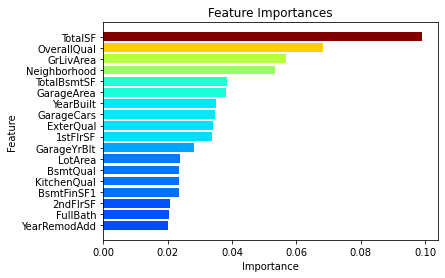

In [61]:
# trimming unimportant features
importances = [i for i in importances if i > 0.02]
features = features[-len(importances):]
features,importances = plots.feature_importances(importances, features)

In [63]:
# re-running the model on the smaller feature set
df_trimmed = df[list(features)]
x_train, x_test, y_train, y_test = train_test_split(df_trimmed, target)
rf.fit(x_train, y_train)
print(f'train score: {rf.score(x_train, y_train)}')
print(f'test score: {rf.score(x_test, y_test)}')

train score: 0.9811481626343286
test score: 0.918685406182677


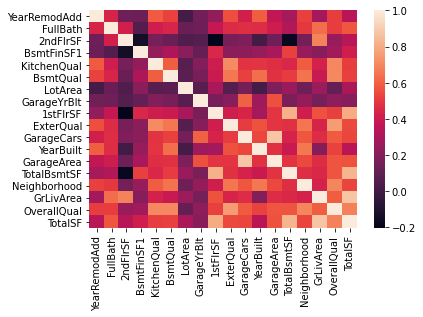

In [64]:
# a small improvement in test score. I'll see if any of the remaining features are
# correlated and can be removed
sns.heatmap(df_trimmed.corr())

In [66]:
df_trimmed.drop(['GarageCars', '1stFlrSF', 'GrLivArea'], axis=1, inplace=True)
rf.fit(x_train, y_train)
print(f'train score: {rf.score(x_train, y_train)}')
print(f'test score: {rf.score(x_test, y_test)}')

/Users/alice/.local/share/virtualenvs/house_prices-8E8ccoAi/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


train score: 0.9808275864617302
test score: 0.9205078021735789


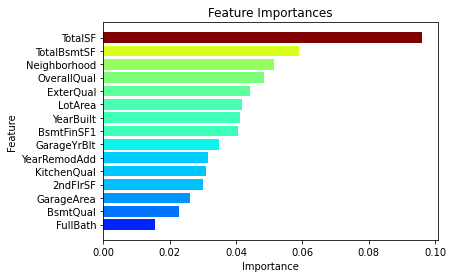

<Figure size 432x288 with 0 Axes>

In [104]:
# another marginal improvement
features,importances = plots.feature_importances(rf.feature_importances_, 
                                                 df_trimmed.columns)
plt.savefig('house price importances.png')

For the most important variables, I'm going to look at how well they correlate with the target.

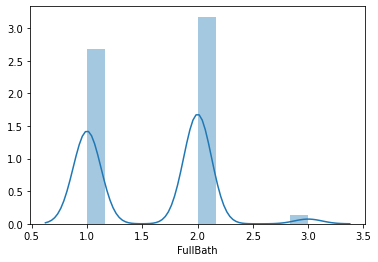

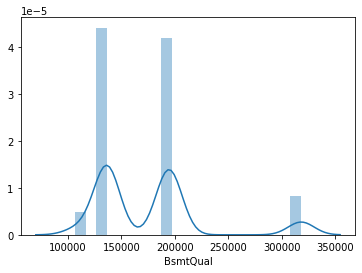

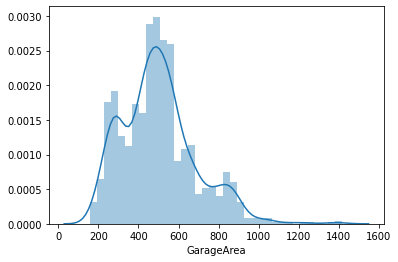

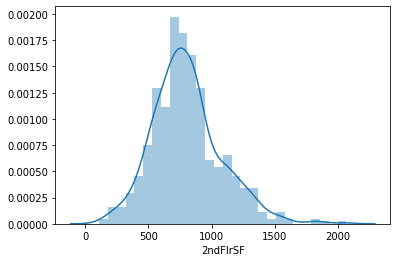

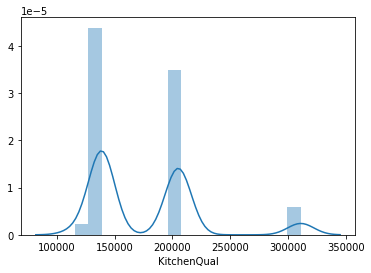

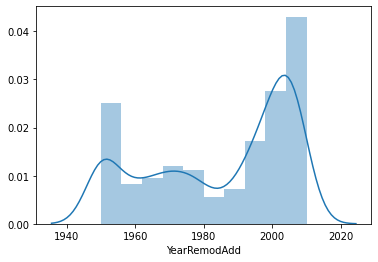

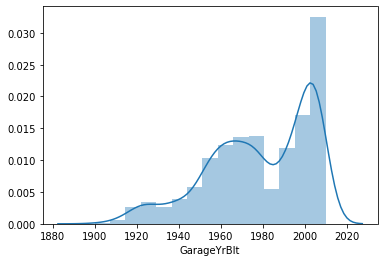

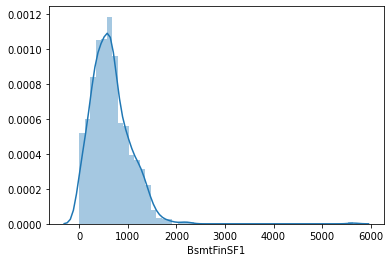

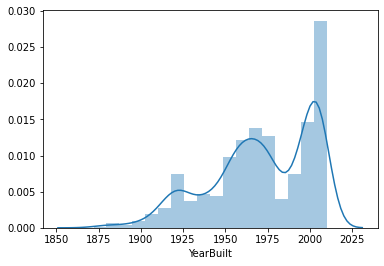

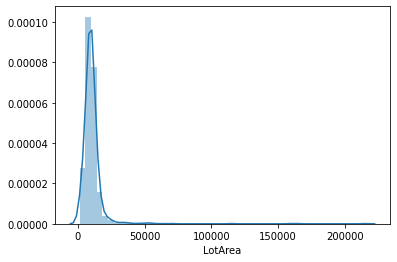

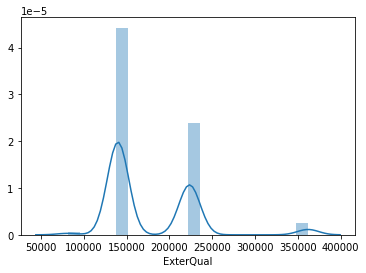

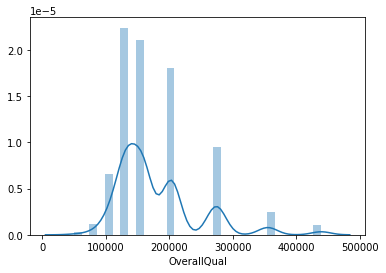

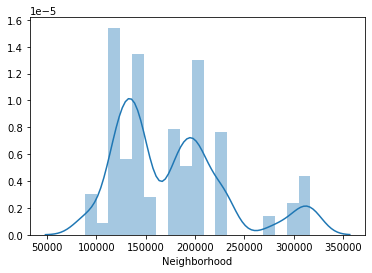

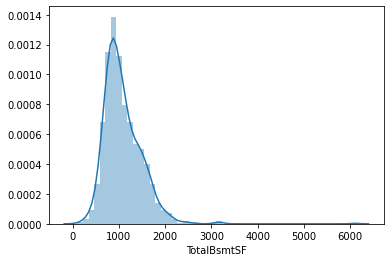

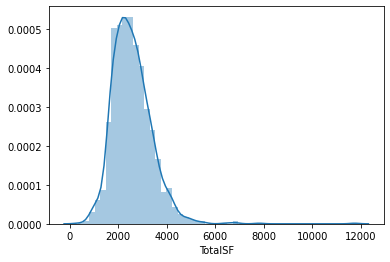

In [81]:
# first, shapes 
for f in features:
    sns.distplot(df[f][df[f]>0])
    plt.show()


In [82]:
normal = ['TotalSF', '2ndFlrSF']
skewed = ['OverallQual', 'TotalBsmtSF', 'LotArea', 'BsmtFinSF1', 'GarageArea']
neither = ['YearBuilt', 'GarageYrBlt', 'YearRemodAdd']

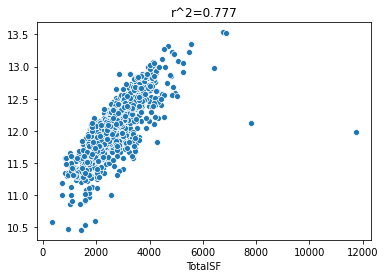

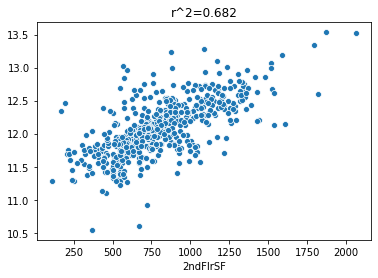

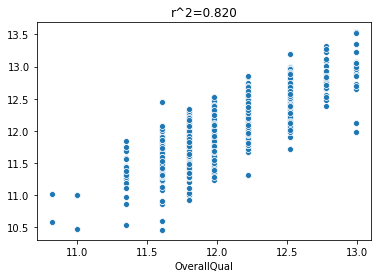

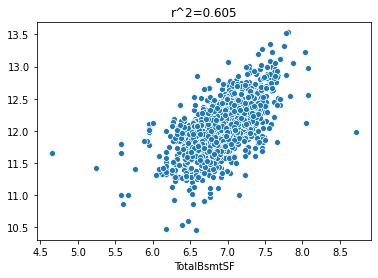

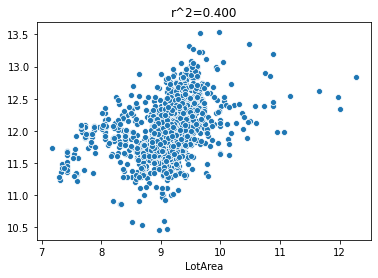

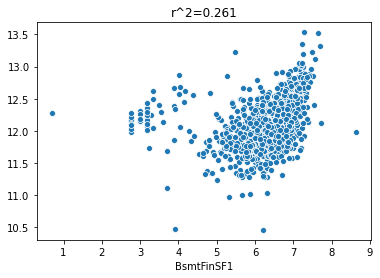

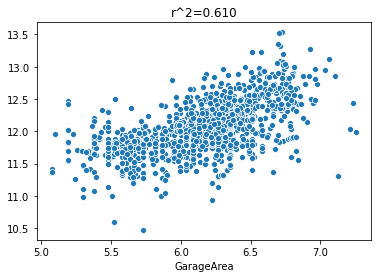

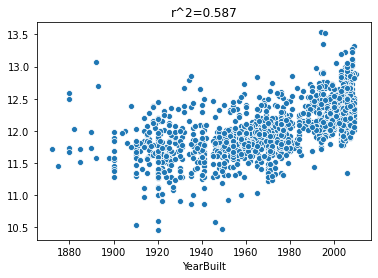

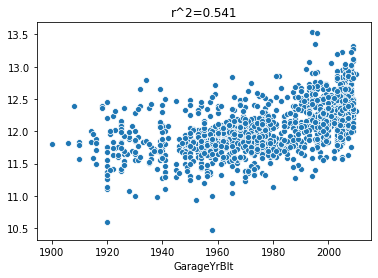

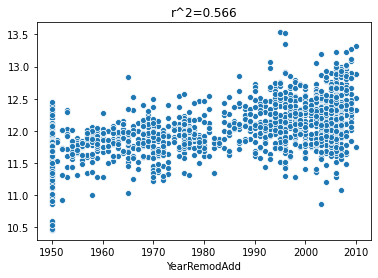

In [97]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

y_trans = np.log(target)
for f in normal+skewed+neither:
    if f in skewed:
        feat = np.log(df[f][df[f]>0])
    else:
        feat = df[f][df[f]>0]
    y = y_trans.loc[y_trans.index.isin(feat.index)]
    r2,p = pearsonr(feat, y)
    sns.scatterplot(feat, y).set_title(f'r^2={r2:.3f}')
    plt.show()

In [103]:
#let's see how linreg does
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

features = pd.DataFrame()
for f in normal+skewed+neither:
    if f in skewed:
        feat = np.log1p(df[f])
    features[f] = feat
    
y_trans = pd.DataFrame(y_trans)
x_train, x_test, y_train, y_test = train_test_split(features, y_trans)

x_scaler = MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

linreg = LinearRegression()
linreg.fit(x_train, y_train)
print(f'train score: {linreg.score(x_train, y_train)}')
print(f'test score: {linreg.score(x_test, y_test)}')

train score: 0.770258499411516
test score: 0.7712174379871012


Random Forest is way better.